In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [5]:
missing = df.isna().mean().round(4) * 100
missing

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [6]:
def emty(rn):
    id=0
    count=[]
    for i in (rn.isna()):
        if i:
            count.append(id)
            id+=1
        else:
            id+=1
    return count

In [7]:
df.country.fillna(method='ffill',inplace = True)

In [8]:
rna  =df.drop(emty(df.agent),axis=0).reset_index(drop=True)
print(rna.shape)
rna.count()

(103050, 32)


hotel                             103050
is_canceled                       103050
lead_time                         103050
arrival_date_year                 103050
arrival_date_month                103050
arrival_date_week_number          103050
arrival_date_day_of_month         103050
stays_in_weekend_nights           103050
stays_in_week_nights              103050
adults                            103050
children                          103048
babies                            103050
meal                              103050
country                           103050
market_segment                    103050
distribution_channel              103050
is_repeated_guest                 103050
previous_cancellations            103050
previous_bookings_not_canceled    103050
reserved_room_type                103050
assigned_room_type                103050
booking_changes                   103050
deposit_type                      103050
agent                             103050
company         

In [9]:
rna  =rna.drop(emty(rna.children),axis=0).reset_index(drop=True)
print(rna.shape)
#rna.count()
rna = rna.drop(['company'],axis=1)
missing = rna.isna().mean().round(4) * 100
missing

(103048, 32)


hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

In [10]:
rx = df.drop(emty(df.company),axis=0).reset_index(drop=True)
print(rx.shape)
"""rx  =rx.drop(emty(rx.children),axis=0).reset_index(drop=True)
print(rx.shape)"""
rx.count()

(6797, 32)


hotel                             6797
is_canceled                       6797
lead_time                         6797
arrival_date_year                 6797
arrival_date_month                6797
arrival_date_week_number          6797
arrival_date_day_of_month         6797
stays_in_weekend_nights           6797
stays_in_week_nights              6797
adults                            6797
children                          6797
babies                            6797
meal                              6797
country                           6797
market_segment                    6797
distribution_channel              6797
is_repeated_guest                 6797
previous_cancellations            6797
previous_bookings_not_canceled    6797
reserved_room_type                6797
assigned_room_type                6797
booking_changes                   6797
deposit_type                      6797
agent                              217
company                           6797
days_in_waiting_list     

In [11]:
rx = rx.drop(['agent'],axis=1)
missing = rx.isna().mean().round(4) * 100
missing

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
company                           0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

In [12]:
rna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103048 entries, 0 to 103047
Data columns (total 31 columns):
hotel                             103048 non-null object
is_canceled                       103048 non-null int64
lead_time                         103048 non-null int64
arrival_date_year                 103048 non-null int64
arrival_date_month                103048 non-null object
arrival_date_week_number          103048 non-null int64
arrival_date_day_of_month         103048 non-null int64
stays_in_weekend_nights           103048 non-null int64
stays_in_week_nights              103048 non-null int64
adults                            103048 non-null int64
children                          103048 non-null float64
babies                            103048 non-null int64
meal                              103048 non-null object
country                           103048 non-null object
market_segment                    103048 non-null object
distribution_channel              103048 n

In [13]:
rna['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [14]:
rna.describe()

is_canceled      lead_time  arrival_date_year  \
count  103048.000000  103048.000000      103048.000000   
mean        0.390032     111.674336        2016.156510   
std         0.487759     107.671506           0.706216   
min         0.000000       0.000000        2015.000000   
25%         0.000000      26.000000        2016.000000   
50%         0.000000      79.000000        2016.000000   
75%         1.000000     169.000000        2017.000000   
max         1.000000     629.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             103048.000000              103048.000000   
mean                  27.339327                  15.784198   
std                   13.285300                   8.794013   
min                    1.000000                   1.000000   
25%                   17.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  24.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            103048.000000         103048.000000  103048.000000   
mean                  0.977874              2.589337       1.899464   
std                   1.003935              1.905763       0.491057   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  16.000000             41.000000      26.000000   

            children         babies  is_repeated_guest  \
count  103048.000000  103048.000000      103048.000000   
mean        0.111142       0.007686           0.014023   
std         0.411817       0.097017           0.117584   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           103048.000000                   103048.000000   
mean                 0.077216                        0.024862   
std                  0.757689                        0.436639   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       50.000000   

       booking_changes          agent  days_in_waiting_list            adr  \
count    103048.000000  103048.000000         103048.000000  103048.000000   
mean          0.201702      86.694841              2.615665     104.619980   
std           0.624797     110.775127             18.783661      50.034041   
min           0.000000       1.000000              0.000000      -6.380000   
25%           0.000000       9.000000              0.000000      72.800000   
50%           0.000000      14.000000              0.000000      96.300000   
75%           0.000000     229.000000              0.000000     127.800000   
max          18.000000     535.000000            391.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                103048.000000              103048.000000  
mean                      0.053218                   0.605368  
std                       0.225719                   0.799222  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0

In [15]:
rx.describe()

is_canceled    lead_time  arrival_date_year  arrival_date_week_number  \
count  6797.000000  6797.000000        6797.000000               6797.000000   
mean      0.175224    49.087980        2016.147859                 25.765779   
std       0.380187    83.355696           0.714188                 15.570111   
min       0.000000     0.000000        2015.000000                  1.000000   
25%       0.000000     3.000000        2016.000000                 12.000000   
50%       0.000000     9.000000        2016.000000                 23.000000   
75%       0.000000    51.000000        2017.000000                 42.000000   
max       1.000000   365.000000        2017.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count                6797.000000              6797.000000   
mean                   15.695160                 0.490511   
std                     8.550549                 0.802497   
min                     1.000000                 0.000000   
25%                     9.000000                 0.000000   
50%                    15.000000                 0.000000   
75%                    22.000000                 1.000000   
max                    31.000000                14.000000   

       stays_in_week_nights       adults     children       babies  \
count           6797.000000  6797.000000  6797.000000  6797.000000   
mean               1.868324     1.302045     0.015448     0.002648   
std                1.696999     0.489276     0.157871     0.051397   
min                0.000000     0.000000     0.000000     0.000000   
25%                1.000000     1.000000     0.000000     0.000000   
50%                1.000000     1.000000     0.000000     0.000000   
75%                3.000000     2.000000     0.000000     0.000000   
max               35.000000     4.000000     3.000000     1.000000   

       is_repeated_guest  previous_cancellations  \
count        6797.000000             6797.000000   
mean            0.245697                0.160071   
std             0.430531                0.607468   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%             0.000000                0.000000   
max             1.000000                6.000000   

       previous_bookings_not_canceled  booking_changes      company  \
count                     6797.000000      6797.000000  6797.000000   
mean                         1.785788         0.435486   189.266735   
std                          5.638983         0.892959   131.655015   
min                          0.000000         0.000000     6.000000   
25%                          0.000000         0.000000    62.000000   
50%                          0.000000         0.000000   179.000000   
75%                          1.000000         1.000000   270.000000   
max                         72.000000        21.000000   543.000000   

       days_in_waiting_list          adr  required_car_parking_spaces  \
count           6797.000000  6797.000000                  6797.000000   
mean               0.294983    67.274186                     0.112403   
std                5.071176    34.200345                     0.317742   
min                0.000000     0.000000                     0.000000   
25%                0.000000    42.000000                     0.000000   
50%                0.000000    66.000000                     0.000000   
75%                0.000000    87.130000                     0.000000   
max              185.000000   315.000000                     2.000000   

       total_of_special_requests  
count                6797.000000  
mean                    0.250405  
std                     0.590514  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     0.000000  
max                     4.000000

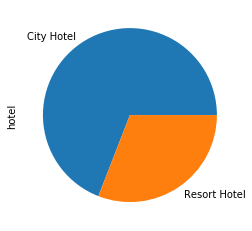

In [16]:
rna["hotel"].value_counts().plot.pie()

(62856, 31)
(40192, 31)


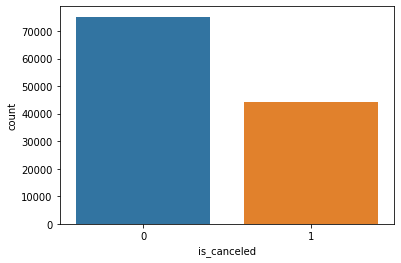

In [17]:
print(rna[rna["is_canceled"]==0].shape)
print(rna[rna["is_canceled"]==1].shape)
sns.countplot(df['is_canceled'])

August       12680
July         11604
May          10089
June          9806
April         9758
October       9461
September     9437
March         8149
February      6461
December      5631
November      5409
January       4563
Name: arrival_date_month, dtype: int64

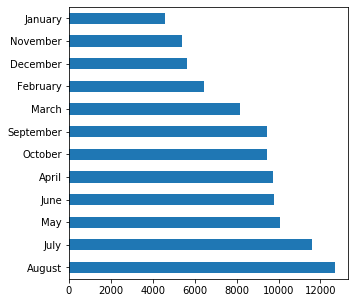

In [18]:
rna.arrival_date_month.value_counts().plot(kind='barh',figsize= (5,5))
rna.arrival_date_month.value_counts()

In [19]:
# get number of acutal guests by country
country_data = pd.DataFrame(rna.loc[rna["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"
# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

<h3>Country of origin. Categories are represented in the ISO 3155–3:2013 format</h3>
<h4>Country with genuine customerd</h4>
<p>PTR:  Portugal has a 22.2% customers who haven't cancelled their booking</p>
<p>GBR:  United Kingdom of Great Britain and Northern Ireland have 13.6% </p>
<p>FRA:  France have 12.6% customers </p>

In [20]:
# get number of guests who cancel by country
country_data = pd.DataFrame(rna.loc[rna["is_canceled"] == 1]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests Cancelling"}, inplace=True)
total_guests = country_data["Number of Guests Cancelling"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests Cancelling"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests Cancelling",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

<h3> Countries with customer who have cancelled thier booking</h3>
<p>PTR:  Portugal has a 22.2% customers who haven't cancelled their booking</p>
<p>GBR:  United Kingdom of Great Britain and Northern Ireland have 5.85% </p>
<p>ESP: Spain have 5.39% customer cannelation</p>

<h4> Portugal and United Kingdom of Great Britain have both cancellation and non cancellation high</h4>

In [21]:
rna.country.value_counts()

PRT    37714
GBR    10903
FRA     9812
ESP     7848
DEU     7000
       ...  
NPL        1
BFA        1
NAM        1
PYF        1
NIC        1
Name: country, Length: 174, dtype: int64

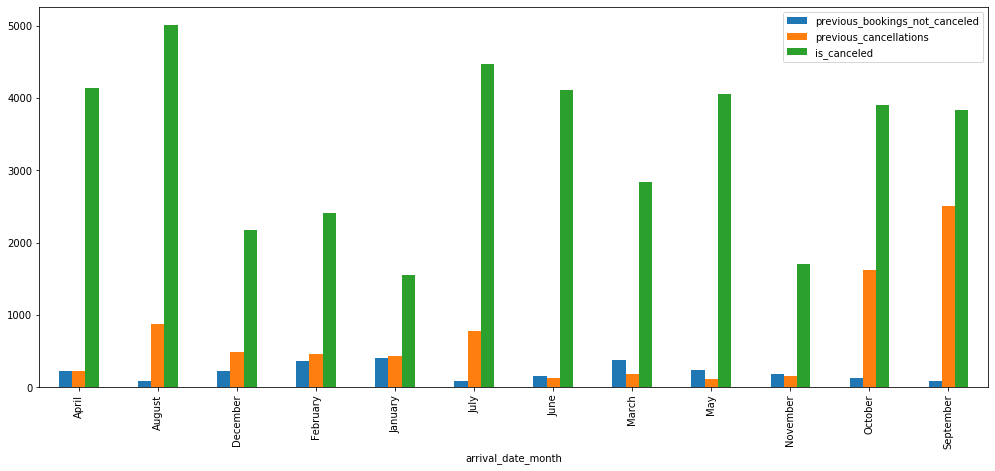

In [22]:
rna.groupby(['arrival_date_month'])['previous_bookings_not_canceled','previous_cancellations','is_canceled'].sum().plot.bar(figsize=(17,7))
#rna.groupby(['arrival_date_month'])['is_canceled','previous_cancellations'].sum()

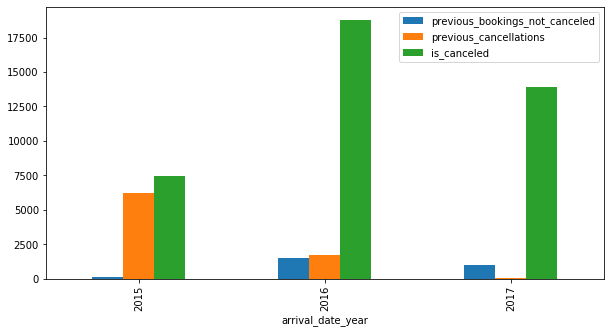

In [23]:
rna.groupby(['arrival_date_year'])['previous_bookings_not_canceled','previous_cancellations','is_canceled'].sum().plot.bar(figsize=(10,5))

<h3>This graph tells us about in these years how many previous bookings were canceled, pervious bookings not cancelled</h3>
It also tells that in the year 2016 the number of cancelation are the highest

          previous_bookings_not_canceled  previous_cancellations  is_canceled
children                                                                     
0.0                                 2502                    7906        37160
1.0                                   26                      24         1508
2.0                                   32                      27         1508
3.0                                    2                       0           15
10.0                                   0                       0            1
        previous_bookings_not_canceled  previous_cancellations  is_canceled
babies                                                                     
0                                 2554                    7950        40041
1                                    8                       7          149
2                                    0                       0            2
9                                    0                       0            

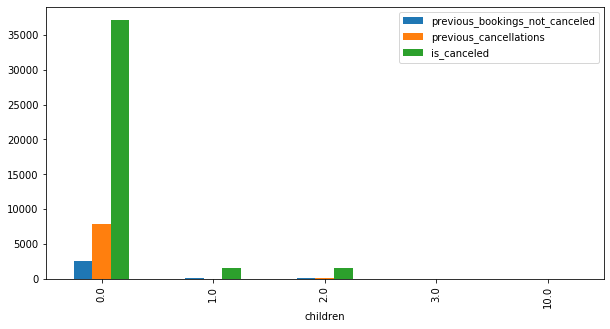

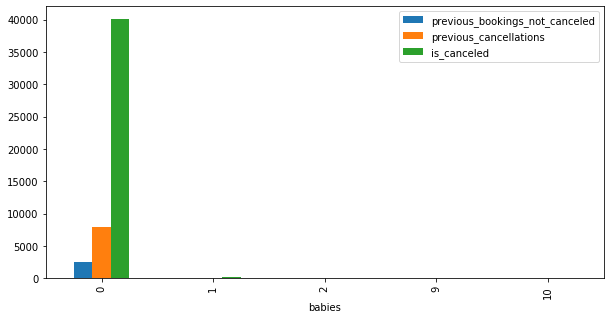

In [24]:
rna.groupby(['children'])['previous_bookings_not_canceled','previous_cancellations','is_canceled'].sum().plot.bar(figsize=(10,5))
print(rna.groupby(['children'])['previous_bookings_not_canceled','previous_cancellations','is_canceled'].sum())
print(rna.groupby(['babies'])['previous_bookings_not_canceled','previous_cancellations','is_canceled'].sum())
rna.groupby(['babies'])['previous_bookings_not_canceled','previous_cancellations','is_canceled'].sum().plot.bar(figsize=(10,5))

<h3> These 2 graphs tell us that customers with 0 babies and children were the highest to cancel bookings</h3>

        previous_bookings_not_canceled  previous_cancellations  is_canceled
adults                                                                     
0                                   14                       7           90
1                                 1490                     950         5170
2                                 1017                    6960        32816
3                                   41                      40         2098
4                                    0                       0           13
26                                   0                       0            5


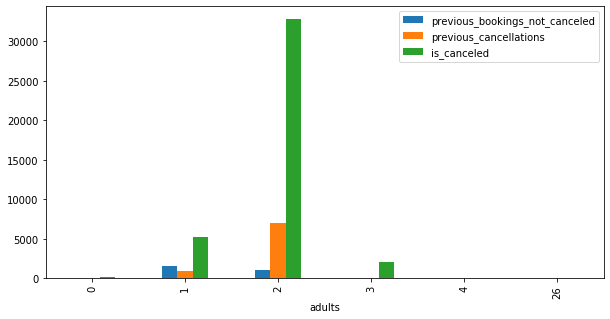

In [25]:
rna.groupby(['adults'])['previous_bookings_not_canceled','previous_cancellations','is_canceled'].sum().plot.bar(figsize=(10,5))
print(rna.groupby(['adults'])['previous_bookings_not_canceled','previous_cancellations','is_canceled'].sum())

<h3> This graph tells us that adults who were to be bring or accompanied with 2 more adults have a higher rate </h3>

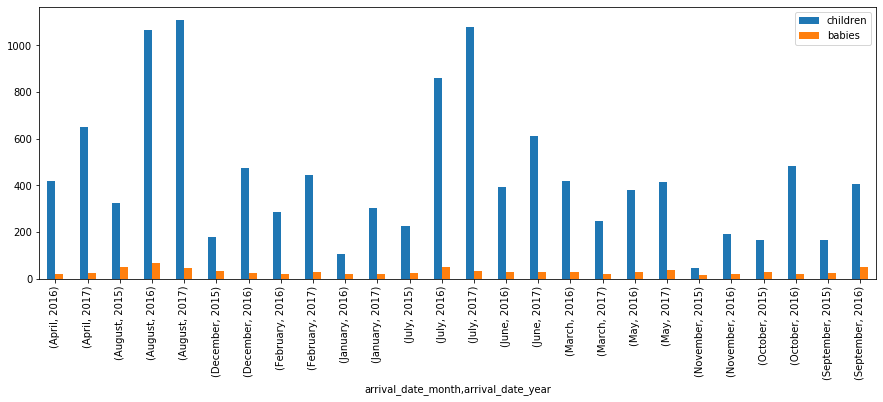

In [26]:
rna.groupby(['arrival_date_month','arrival_date_year'])['children', 'babies'].sum().plot.bar(figsize=(15,5))

<h4>From this graph we see that how many childrens and babies arrived</h4>

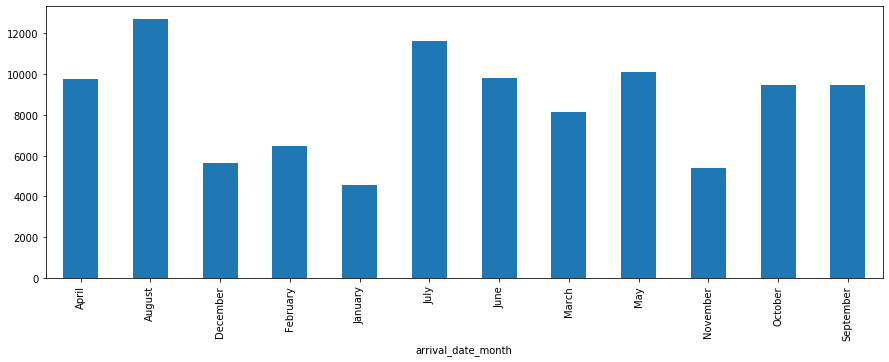

In [27]:
rna.groupby(['arrival_date_month'])['arrival_date_year'].size().plot.bar(figsize=(15,5))

<h4>Average month count of arrival of all the three years is shown in above chart</h4>

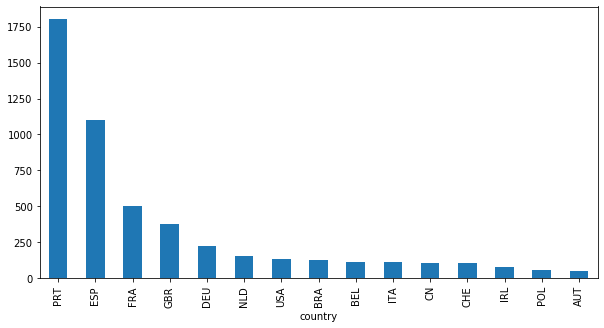

In [28]:
rna.groupby(['country'])['required_car_parking_spaces'].sum().sort_values(ascending=False).head(15).plot.bar(figsize=(10,5))

<h4> This shows the top 15 counties which require parking spaces</h4>
Portugal at 1st and spain at 2nd

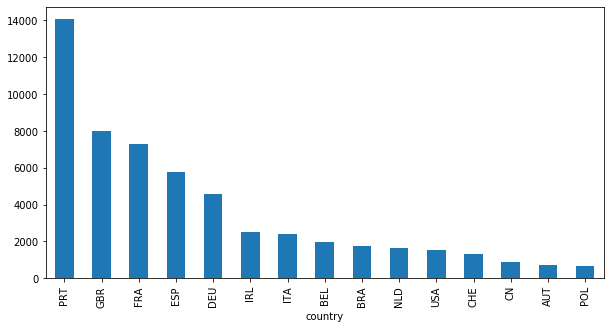

In [29]:
rna.groupby(['country'])['total_of_special_requests'].sum().sort_values(ascending=False).head(15).plot.bar(figsize=(10,5))

<h4>This shows the top 15 counties which require special requests</h4>


previous_bookings_not_canceled  previous_cancellations  \
deposit_type                                                           
No Deposit                              2561                    3012   
Non Refund                                 1                    4945   
Refundable                                 0                       0   

              is_canceled  
deposit_type               
No Deposit          27686  
Non Refund          12482  
Refundable             24

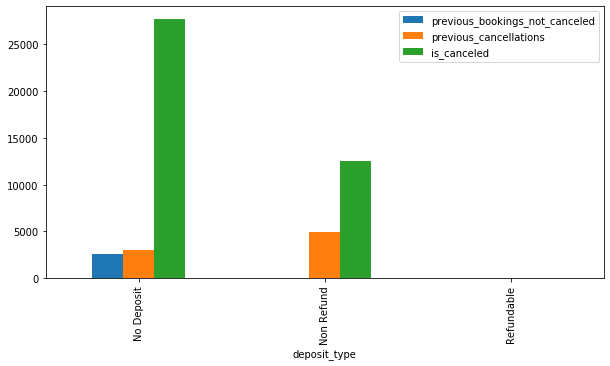

In [30]:
rna.groupby(['deposit_type'])['previous_bookings_not_canceled','previous_cancellations','is_canceled'].sum().plot.bar(figsize=(10,5))
rna.groupby(['deposit_type'])['previous_bookings_not_canceled','previous_cancellations','is_canceled'].sum()

This graph shows that customers who have done no deposit are booking , would most likely would cancel their booking

In [31]:
rna.groupby(['customer_type'])['previous_bookings_not_canceled','previous_cancellations','is_canceled'].sum()


previous_bookings_not_canceled  previous_cancellations  \
customer_type                                                             
Contract                                     17                     919   
Group                                       284                      21   
Transient                                  1993                    4561   
Transient-Party                             268                    2456   

                 is_canceled  
customer_type                 
Contract                1262  
Group                     40  
Transient              33428  
Transient-Party         5462

<h4>Trancent customers are most likely to cancel their booking</h4>
#Transient customer means a customer who is temporarily traveling through a dealer's area of sales responsibility.

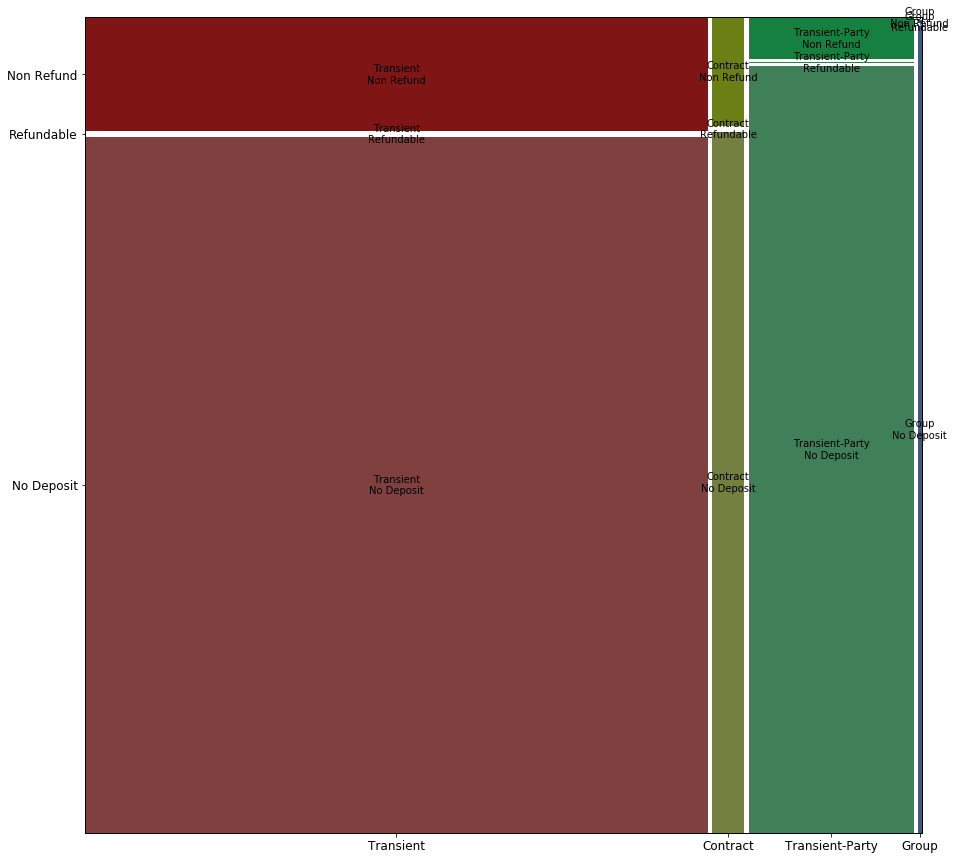

In [32]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = (15,15)
mosaic(rna, ['customer_type', 'deposit_type']);
plt.show()

<h3>This is a comparision between customer type and type of trasaction</h3> 
    Here in this graph we see that most of the Transient customer do No Deposit type of transaction
    <br>
We also see that in our dataset most of the customers are Transient  No Deposit and its successive is transient-party No Deposit<br>
    And we also see that Group customer form the minority in our dataset 

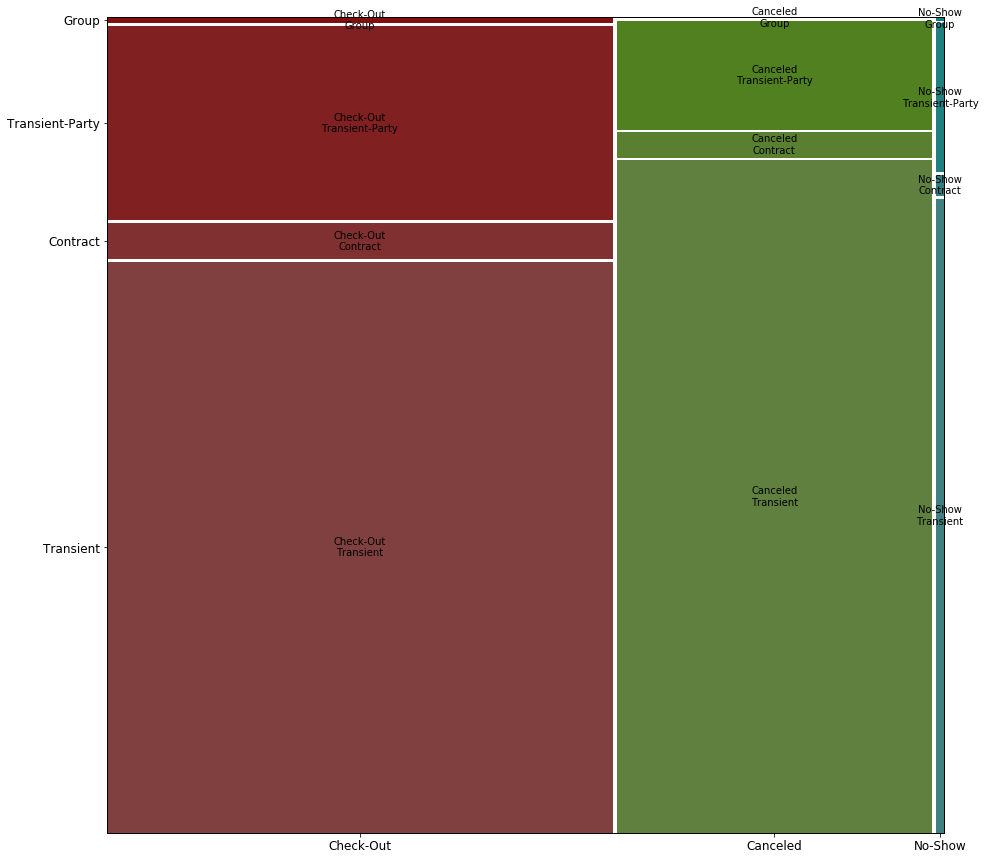

In [33]:
plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = (15,15)
mosaic(rna, ['reservation_status', 'customer_type']);
plt.show()

<h3>This is a comparision between customer type and reservation status</h3> 
    Here in this graph we see that Transient customers are the most dominant with high chech-out and cancels 
    <br>
    Again we see that Group customer form the minority

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text xticklabel objects>)

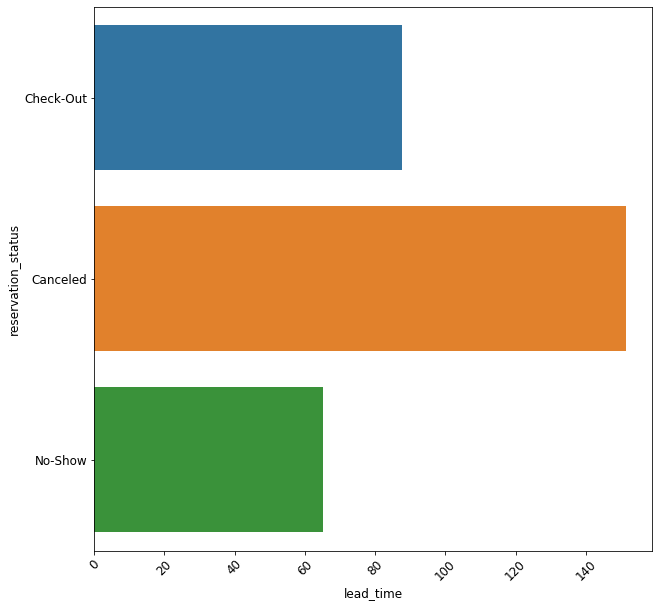

In [34]:
plt.figure(figsize=(10,10))
sns.barplot(x='lead_time',y='reservation_status',data=rna,ci=None)
plt.xticks(rotation=45) #check if its needed

<h3>Based of the reservation status we are looking into lead_time</h3>
#Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text xticklabel objects>)

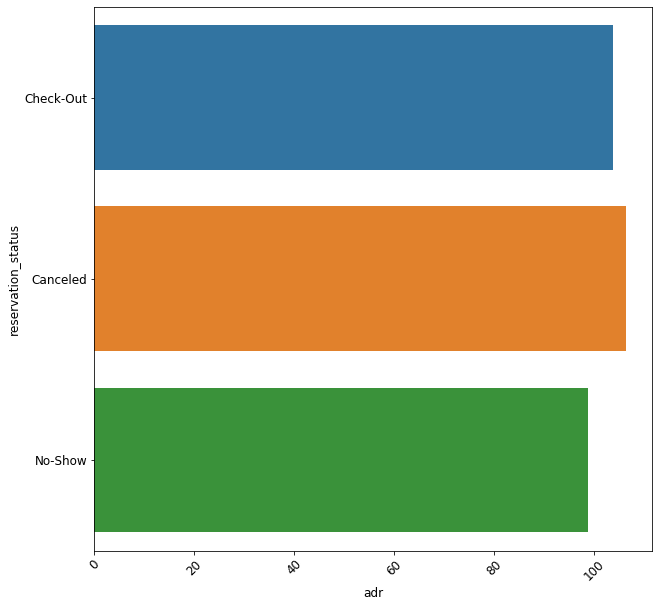

In [35]:
plt.figure(figsize=(10,10))
sns.barplot(x='adr',y='reservation_status',data=rna,ci=None)
plt.xticks(rotation=45) #check if its needed

<h3> Based on the reservation status looking into the adr</h3>
Average Daily Rate is a statistical unit that is often used in the lodging industry. The number represents the average rental income per paid occupied room in a given time period. ADR along with the property's occupancy are the foundations for the property's financial performance.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

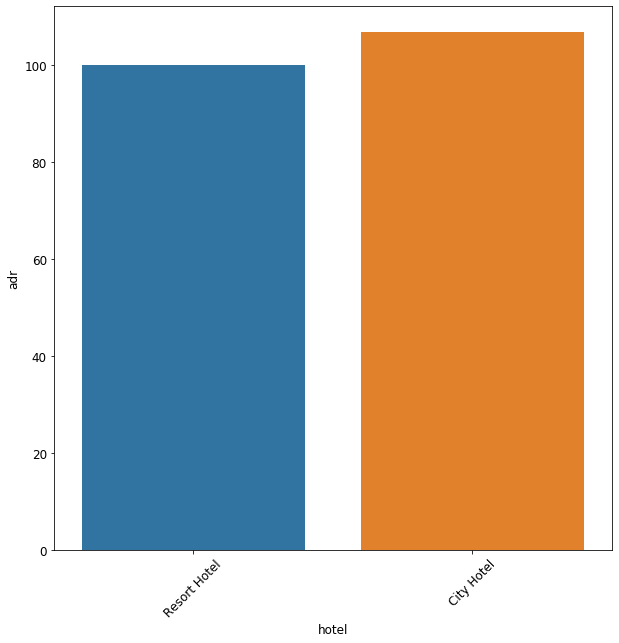

In [36]:
plt.figure(figsize=(10,10))
sns.barplot(x='hotel',y='adr',data=rna,ci=None)
plt.xticks(rotation=45) #check if its needed

<h3> Hotel comparision for adr</h3>
From this graph we can say that city hotels make adr (avg. rental income)

<h2>Correlation</h2>

In [37]:
rna1 = rna[['is_canceled','lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','agent','adr','required_car_parking_spaces','total_of_special_requests']]
rna1.head()

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0         13               2015                        27   
1            0         14               2015                        27   
2            0         14               2015                        27   
3            0          9               2015                        27   
4            1         85               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     1   
1                          1                        0                     2   
2                          1                        0                     2   
3                          1                        0                     2   
4                          1                        0                     3   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       1       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       2       0.0       0                  0                       0   
3       2       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  booking_changes  agent    adr  \
0                               0                0  304.0   75.0   
1                               0                0  240.0   98.0   
2                               0                0  240.0   98.0   
3                               0                0  303.0  103.0   
4                               0                0  240.0   82.0   

   required_car_parking_spaces  total_of_special_requests  
0                            0                          0  
1                            0                          1  
2                            0                          1  
3                            0                          1  
4                            0                          1

In [38]:
rna1.corr(method="pearson")

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.278285           0.004354   
lead_time                          0.278285   1.000000           0.040647   
arrival_date_year                  0.004354   0.040647           1.000000   
arrival_date_week_number           0.004548   0.120481          -0.530492   
arrival_date_day_of_month         -0.005383  -0.003509           0.005581   
stays_in_weekend_nights           -0.023241   0.048336           0.020734   
stays_in_week_nights               0.004430   0.124940           0.032361   
adults                             0.037872   0.073302           0.061519   
children                           0.005409  -0.049635           0.065417   
babies                            -0.031972  -0.021912          -0.009767   
is_repeated_guest                 -0.029881  -0.055342          -0.022339   
previous_cancellations             0.118150   0.100450          -0.134084   
previous_bookings_not_canceled    -0.043390  -0.045931           0.015264   
booking_changes                   -0.131667  -0.000309           0.036552   
agent                             -0.083099  -0.069755           0.063438   
adr                                0.023652  -0.111681           0.222051   
required_car_parking_spaces       -0.188533  -0.111357          -0.012985   
total_of_special_requests         -0.257999  -0.123104           0.121619   

                                arrival_date_week_number  \
is_canceled                                     0.004548   
lead_time                                       0.120481   
arrival_date_year                              -0.530492   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.057495   
stays_in_weekend_nights                         0.010331   
stays_in_week_nights                            0.013568   
adults                                          0.003835   
children                                       -0.000708   
babies                                          0.007855   
is_repeated_guest                              -0.013072   
previous_cancellations                          0.042691   
previous_bookings_not_canceled                 -0.025422   
booking_changes                                 0.008509   
agent                                          -0.031196   
adr                                             0.062741   
required_car_parking_spaces                    -0.001385   
total_of_special_requests                       0.021499   

                                arrival_date_day_of_month  \
is_canceled                                     -0.005383   
lead_time                                       -0.003509   
arrival_date_year                                0.005581   
arrival_date_week_number                         0.057495   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.016512   
stays_in_week_nights                            -0.031063   
adults                                           0.001203   
children                                         0.013563   
babies                                          -0.002401   
is_repeated_guest                               -0.008270   
previous_cancellations                          -0.025007   
previous_bookings_not_canceled                   0.001200   
booking_changes                                  0.011453   
agent                                            0.001477   
adr                                              0.025657   
required_car_parking_spaces                      0.004578   
total_of_special_requests                        0.002410   

                                stays_in_weekend_nights  stays_in_week_nights  \
is_canceled                                   -0.023241              0.004430   
lead_time                                      0.048336              0.124940   
arrival_date_year       

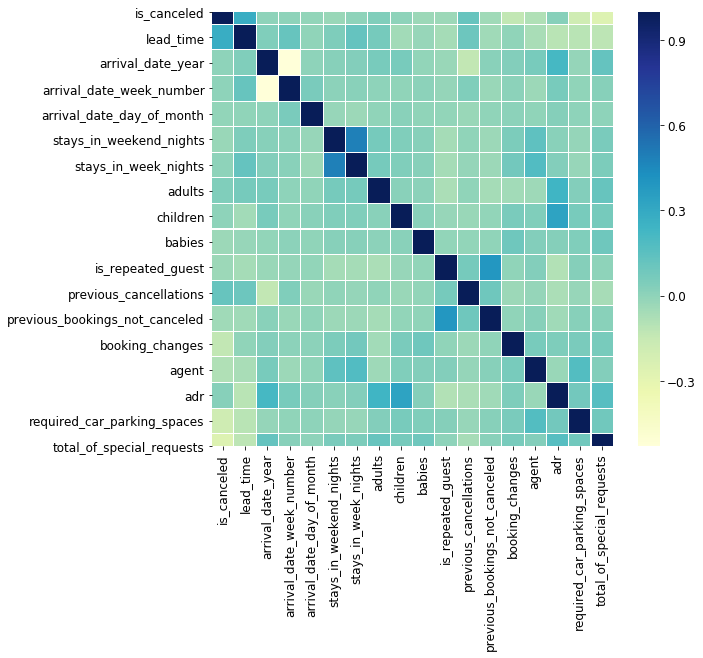

In [39]:
correlationmatrix = rna1.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(correlationmatrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [40]:
rx1 = rx[['is_canceled','lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','company','adr','required_car_parking_spaces','total_of_special_requests']]
rx1.head()

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0          0               2015                        27   
1            1          1               2015                        28   
2            1          1               2015                        28   
3            0          1               2015                        28   
4            0         84               2015                        28   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     1   
1                          8                        0                     1   
2                          8                        0                     1   
3                          8                        0                     2   
4                         11                        1                     1   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       2       0.0       0                  0                       0   
3       2       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  booking_changes  company     adr  \
0                               0                0    110.0  107.42   
1                               0                0    110.0  104.72   
2                               0                0    110.0  104.72   
3                               0                0    110.0  104.72   
4                               0                0    113.0  100.00   

   required_car_parking_spaces  total_of_special_requests  
0                            0                          0  
1                            0                          1  
2                            0                          1  
3                            1                          1  
4                            1                          0

In [41]:
rx1.corr(method="pearson")

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.104393           0.026500   
lead_time                          0.104393   1.000000          -0.090656   
arrival_date_year                  0.026500  -0.090656           1.000000   
arrival_date_week_number          -0.039152   0.166241          -0.645688   
arrival_date_day_of_month          0.030692   0.101958           0.015069   
stays_in_weekend_nights           -0.084014   0.101657          -0.062635   
stays_in_week_nights              -0.001408   0.321791          -0.054229   
adults                             0.071402   0.331155          -0.049923   
children                          -0.020590   0.001373           0.004535   
babies                            -0.016221   0.013890          -0.034721   
is_repeated_guest                 -0.161477  -0.277195           0.125895   
previous_cancellations             0.083690  -0.039331           0.017680   
previous_bookings_not_canceled    -0.094708  -0.144311           0.108635   
booking_changes                   -0.148954   0.261414          -0.022995   
company                           -0.020642   0.151464           0.259095   
adr                                0.121518   0.047345           0.124544   
required_car_parking_spaces       -0.163066   0.003943           0.040225   
total_of_special_requests         -0.106985  -0.150461           0.122584   

                                arrival_date_week_number  \
is_canceled                                    -0.039152   
lead_time                                       0.166241   
arrival_date_year                              -0.645688   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.055051   
stays_in_weekend_nights                         0.119458   
stays_in_week_nights                            0.042666   
adults                                          0.023852   
children                                        0.025417   
babies                                          0.036079   
is_repeated_guest                              -0.034042   
previous_cancellations                          0.019848   
previous_bookings_not_canceled                 -0.014445   
booking_changes                                 0.045131   
company                                        -0.076760   
adr                                             0.017973   
required_car_parking_spaces                     0.016922   
total_of_special_requests                       0.005164   

                                arrival_date_day_of_month  \
is_canceled                                      0.030692   
lead_time                                        0.101958   
arrival_date_year                                0.015069   
arrival_date_week_number                         0.055051   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.045862   
stays_in_week_nights                            -0.076237   
adults                                           0.008295   
children                                         0.026925   
babies                                           0.027619   
is_repeated_guest                               -0.010509   
previous_cancellations                          -0.001936   
previous_bookings_not_canceled                   0.004462   
booking_changes                                 -0.036726   
company                                          0.044858   
adr                                              0.063735   
required_car_parking_spaces                      0.021713   
total_of_special_requests                       -0.005017   

                                stays_in_weekend_nights  stays_in_week_nights  \
is_canceled                                   -0.084014             -0.001408   
lead_time                                      0.101657              0.321791   
arrival_date_year       

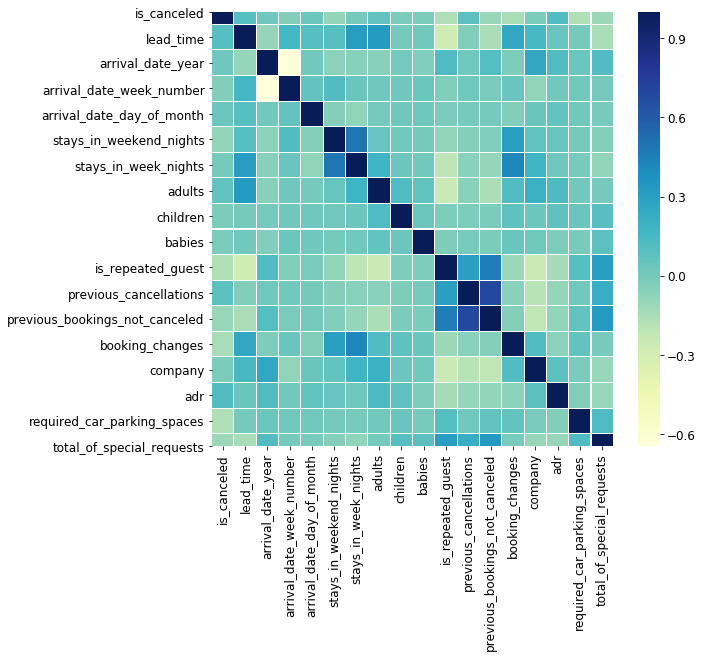

In [42]:
correlationmatrix = rx1.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(correlationmatrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

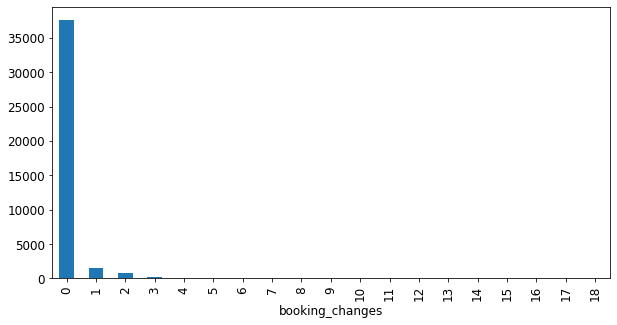

In [43]:
rna.groupby(['booking_changes'])['is_canceled'].sum().plot.bar(figsize=(10,5))

<h3>In our dataset customers with booking changes are almost frequent to cancel their booking </h3>

<h1> Machine learning models</h1>

In [44]:
rna.head()
rna.groupby(['is_canceled'])['reservation_status'].value_counts(normalize=True)

is_canceled  reservation_status
0            Check-Out             1.000000
1            Canceled              0.975045
             No-Show               0.024955
Name: reservation_status, dtype: float64

In [45]:
rna["customer_type"].value_counts()

Transient          77884
Transient-Party    20623
Contract            4063
Group                478
Name: customer_type, dtype: int64

In [46]:
rna["reservation_status"].value_counts()

Check-Out    62856
Canceled     39189
No-Show       1003
Name: reservation_status, dtype: int64

In [47]:
rna["deposit_type"].value_counts()

No Deposit    90464
Non Refund    12536
Refundable       48
Name: deposit_type, dtype: int64

In [48]:
rna["meal"].value_counts()

BB           77779
HB           13433
SC           10334
Undefined      831
FB             671
Name: meal, dtype: int64

In [49]:
rna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103048 entries, 0 to 103047
Data columns (total 31 columns):
hotel                             103048 non-null object
is_canceled                       103048 non-null int64
lead_time                         103048 non-null int64
arrival_date_year                 103048 non-null int64
arrival_date_month                103048 non-null object
arrival_date_week_number          103048 non-null int64
arrival_date_day_of_month         103048 non-null int64
stays_in_weekend_nights           103048 non-null int64
stays_in_week_nights              103048 non-null int64
adults                            103048 non-null int64
children                          103048 non-null float64
babies                            103048 non-null int64
meal                              103048 non-null object
country                           103048 non-null object
market_segment                    103048 non-null object
distribution_channel              103048 n

In [50]:
Feature = rna[['lead_time','adults','children','babies','is_repeated_guest','previous_cancellations','booking_changes','required_car_parking_spaces','total_of_special_requests','agent','adr']]
Feature = pd.concat([Feature,pd.get_dummies(rna['deposit_type'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(rna['assigned_room_type'])], axis=1)
#Feature = pd.concat([Feature,pd.get_dummies(rna['distribution_channel'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(rna['customer_type'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(rna['meal'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(rna['market_segment'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(rna['hotel'])], axis=1)
X = Feature
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
#Feature.head()
#Feature.shape
#Feature.info()
X[0:5]

lead_time  adults  children  babies  is_repeated_guest  \
0         13       1       0.0       0                  0   
1         14       2       0.0       0                  0   
2         14       2       0.0       0                  0   
3          9       2       0.0       0                  0   
4         85       2       0.0       0                  0   

   previous_cancellations  booking_changes  required_car_parking_spaces  \
0                       0                0                            0   
1                       0                0                            0   
2                       0                0                            0   
3                       0                0                            0   
4                       0                0                            0   

   total_of_special_requests  agent  ...  Undefined  Aviation  Complementary  \
0                          0  304.0  ...          0         0              0   
1                          1  240.0  ...          0         0              0   
2                          1  240.0  ...          0         0              0   
3                          1  303.0  ...          0         0              0   
4                          1  240.0  ...          0         0              0   

   Corporate  Direct  Groups  Offline TA/TO  Online TA  City Hotel  \
0          1       0       0              0          0           0   
1          0       0       0              0          1           0   
2          0       0       0              0          1           0   
3          0       1       0              0          0           0   
4          0       0       0              0          1           0   

   Resort Hotel  
0             1  
1             1  
2             1  
3             1  
4             1  

[5 rows x 42 columns]

In [51]:
y = rna['is_canceled'].values
#y = rna['reservation_status'].values
y[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [52]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:2]  #Normalization

array([[-0.91644316, -1.83169885, -0.26988415, -0.07922076, -0.11925612,
        -0.10191091, -0.32282969, -0.23577171, -0.75745052,  1.96168779,
        -0.59199943,  0.37296791, -0.37215719, -0.02158748,  0.77180891,
        -0.13628236, -0.13617151, -0.52083735, -0.25552652, -0.1772529 ,
        -0.14670126, -0.07659274, -0.05172814, -0.04656966, -0.20259966,
        -0.06826589,  0.56841524, -0.50020317,  0.56998424, -0.08095805,
        -0.38716506, -0.33385783, -0.0901652 , -0.01557768, -0.03163122,
        12.083105  , -0.26155019, -0.42336897, -0.54846647, -1.09373166,
        -1.4950968 ,  1.4950968 ],
       [-0.90715561,  0.20473416, -0.26988415, -0.07922076, -0.11925612,
        -0.10191091, -0.32282969, -0.23577171,  0.49377197,  1.38393796,
        -0.13231016,  0.37296791, -0.37215719, -0.02158748,  0.77180891,
        -0.13628236, -0.13617151, -0.52083735, -0.25552652, -0.1772529 ,
        -0.14670126, -0.07659274, -0.05172814, -0.04656966, -0.20259966,
        -0.06826

In [53]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

<h1>K Nearest Neighbor(KNN)</h1>

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [56]:
def knn(X_train,X_test,y_train,y_test):
    Ks = 20
    mean_acc = np.zeros((Ks-1))
    std_acc = np.zeros((Ks-1))
    ConfustionMx = [];
    for n in range(1,Ks):

        #Train Model and Predict  
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        yhat=neigh.predict(X_test)
        mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


        std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

    mean_acc
    print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
    plt.figure(figsize=(8,5))
    plt.plot(range(1,Ks),mean_acc,'g')
    plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Nabors (K)')
    plt.tight_layout()
    plt.figure(figsize=(10,10))
    plt.show()

In [57]:
def knnSpecific(k,X_train,X_test,y_train,y_test):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

    print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
    knnf1 = f1_score(y_test, yhat, average='weighted')
    print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat))
    knnja = jaccard_similarity_score(y_test, yhat)
    print("Precision: %.4f" % precision_score(y_test, yhat))
    print("Recall: %.4f" % recall_score(y_test, yhat))
    print("AUC Score: %.4f" % roc_auc_score(y_test, yhat))
    return knnf1,knnja

The best accuracy was with 0.8213973799126637 with k= 9


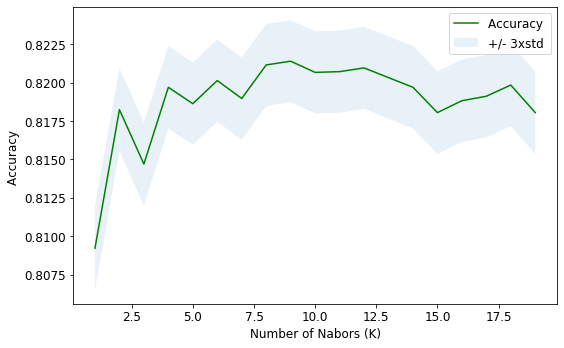

<Figure size 720x720 with 0 Axes>

In [58]:
knn(X_train,X_test,y_train,y_test)

In [59]:
knnf1,knnja = knnSpecific(9,X_train,X_test,y_train,y_test)

Train set Accuracy:  0.8506999199398336
Test set Accuracy:  0.8213973799126637
Avg F1-score: 0.8193
Jaccard score: 0.8214
Precision: 0.8067
Recall: 0.7176
AUC Score: 0.8031


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



<h1>Decision Tree</h1>

In [60]:
from sklearn.tree import DecisionTreeClassifier
def decision_tree(X_train,X_test,y_train,y_test):
    Ks = 40
    mean_acc = np.zeros((Ks-1))
    std_acc = np.zeros((Ks-1))
    ConfustionMx = [];
    for n in range(3,Ks):

        #Train Model and Predict  
        DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = n)
        DT_model.fit(X_train,y_train)

        yhat=DT_model.predict(X_test)
        mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


        std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

    mean_acc
    print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
    plt.figure(figsize=(8,5))
    plt.plot(range(1,Ks),mean_acc,'g')
    plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Nabors (K)')
    plt.tight_layout()
    plt.figure(figsize=(10,10))
    plt.show()

In [62]:
def decision(i,X_train,X_test,y_train,y_test):
    DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    DT_model.fit(X_train,y_train)
    yhat = DT_model.predict(X_test)
    print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
    treef1 = f1_score(y_test, yhat, average='weighted')
    print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
    treeja = jaccard_similarity_score(y_test, yhat)
    print("Precision: %.4f" % precision_score(y_test, yhat))
    print("Recall: %.4f" % recall_score(y_test, yhat))
    print("AUC Score: %.4f" % roc_auc_score(y_test, yhat))
    return treef1,treeja

The best accuracy was with 0.8252789907811742 with k= 19


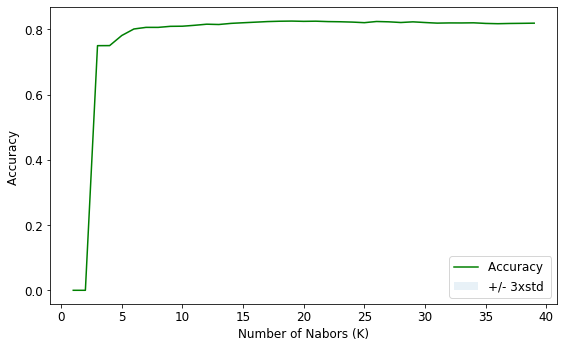

<Figure size 720x720 with 0 Axes>

In [63]:
decision_tree(X_train,X_test,y_train,y_test)

In [64]:
treef1,treeja = decision(19,X_train,X_test,y_train,y_test)

Avg F1-score: 0.8244
Jaccard score: 0.8259
Test set Accuracy:  0.8258612324114507
Precision: 0.8040
Recall: 0.7366
AUC Score: 0.8101


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



<h1>SVM</h1>

In [65]:
from sklearn import svm
def SVM_model(X_train,X_test,y_train,y_test):
    loansvm = svm.SVC(kernel='rbf')
    loansvm.fit(X_train, y_train)
    ysvm = loansvm.predict(X_test)
    #print("SVM's Accuracy: ", metrics.accuracy_score(y_test, ysvm))
    print("Avg F1-score: %.4f" % f1_score(y_test, ysvm, average='weighted'))
    svmf1 = f1_score(y_test, ysvm, average='weighted')
    print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, ysvm))
    svmja = jaccard_similarity_score(y_test, ysvm)
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, ysvm))
    print("Precision: %.4f" % precision_score(y_test, ysvm))
    print("Recall: %.4f" % recall_score(y_test, ysvm))
    print("AUC Score: %.4f" % roc_auc_score(y_test, ysvm))
    return svmf1,svmja

In [66]:
svmf1,svmja = SVM_model(X_train,X_test,y_train,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Avg F1-score: 0.8020
Jaccard score: 0.8073
Test set Accuracy:  0.8072780203784571
Precision: 0.8235
Recall: 0.6487
AUC Score: 0.7793


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



<h1>Logistic Regression</h1>

In [67]:
from sklearn.linear_model import LogisticRegression
def lr(X_train,X_test,y_train,y_test):
    LR = LogisticRegression(C=0.001, solver='saga').fit(X_train,y_train)
    ylr = LR.predict(X_test)
    ylr_prob = LR.predict_proba(X_test)
    print("Avg F1-score: %.4f" % f1_score(y_test, ylr, average='weighted'))
    lrf1 = f1_score(y_test, ylr, average='weighted')
    print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, ylr))
    lrja = jaccard_similarity_score(y_test, ylr)
    print("Log Loss score: %.4f" % log_loss(y_test, ylr_prob))
    lrlo = log_loss(y_test, ylr_prob)
    print("Test set Accuracy: ", metrics.accuracy_score(y_test,ylr))
    print("Precision: %.4f" % precision_score(y_test, ylr))
    print("Recall: %.4f" % recall_score(y_test, ylr))
    print("AUC Score: %.4f" % roc_auc_score(y_test, ylr))
    return lrf1,lrja,lrlo

In [68]:
lrf1,lrja,lrlo = lr(X_train,X_test,y_train,y_test)

Avg F1-score: 0.7843
Jaccard score: 0.7935
Log Loss score: 0.4503
Test set Accuracy:  0.7935468219311014
Precision: 0.8411
Recall: 0.5854
AUC Score: 0.7569


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



In [69]:
tab = [['KNN',knnf1,knnja,'NA'],['Decision Tree',treef1,treeja,'NA'],['SVM',svmf1,svmja,'NA'],['Logistic Regression',lrf1,lrja,lrlo]]
result=pd.DataFrame(tab, columns = ['Algorithm', 'F1-score','Jaccard','LogLoss']) 
result

Algorithm  F1-score   Jaccard   LogLoss
0                  KNN  0.819260  0.821397        NA
1        Decision Tree  0.824353  0.825861        NA
2                  SVM  0.802032  0.807278        NA
3  Logistic Regression  0.784293  0.793547  0.450316

In [70]:
rna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103048 entries, 0 to 103047
Data columns (total 31 columns):
hotel                             103048 non-null object
is_canceled                       103048 non-null int64
lead_time                         103048 non-null int64
arrival_date_year                 103048 non-null int64
arrival_date_month                103048 non-null object
arrival_date_week_number          103048 non-null int64
arrival_date_day_of_month         103048 non-null int64
stays_in_weekend_nights           103048 non-null int64
stays_in_week_nights              103048 non-null int64
adults                            103048 non-null int64
children                          103048 non-null float64
babies                            103048 non-null int64
meal                              103048 non-null object
country                           103048 non-null object
market_segment                    103048 non-null object
distribution_channel              103048 n

<h1>Regression</h1>

In [113]:
regX = rna[['is_canceled','arrival_date_week_number','children','babies','booking_changes','agent','total_of_special_requests','adr']]
regX.head()

is_canceled  arrival_date_week_number  children  babies  booking_changes  \
0            0                        27       0.0       0                0   
1            0                        27       0.0       0                0   
2            0                        27       0.0       0                0   
3            0                        27       0.0       0                0   
4            1                        27       0.0       0                0   

   agent  total_of_special_requests    adr  
0  304.0                          0   75.0  
1  240.0                          1   98.0  
2  240.0                          1   98.0  
3  303.0                          1  103.0  
4  240.0                          1   82.0

In [114]:
msk = np.random.rand(len(rna)) < 0.7
train = regX[msk]
test = regX[~msk]

In [115]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['is_canceled','arrival_date_week_number','children','babies','booking_changes','agent','total_of_special_requests']])
y = np.asanyarray(train[['adr']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 6.70156160e+00  2.13006573e-01  3.98534481e+01  2.83593124e+00
   2.52619578e+00 -1.74575111e-02  9.90019936e+00]]


In [116]:
y_hat= regr.predict(test[['is_canceled','arrival_date_week_number','children','babies','booking_changes','agent','total_of_special_requests']])
x_t = np.asanyarray(test[['is_canceled','arrival_date_week_number','children','babies','booking_changes','agent','total_of_special_requests']])
y = np.asanyarray(test[['adr']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_t, y))
print(y_hat[0])
print(y[0])

Residual sum of squares: 1858.99
Variance score: 0.16
[104.89178668]
[82.]


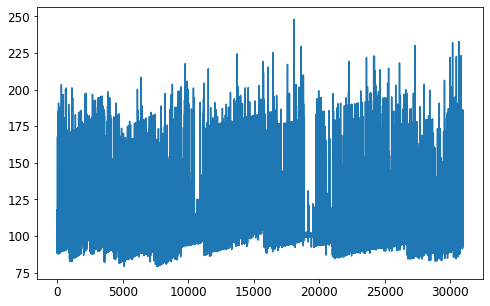

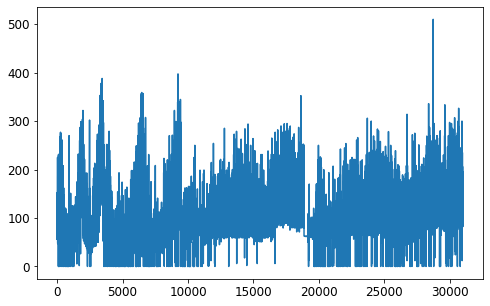

In [117]:
plt.figure(figsize=(8,5))
plt.plot(y_hat)
plt.show()
plt.figure(figsize=(8,5))
plt.plot(y)
plt.show()

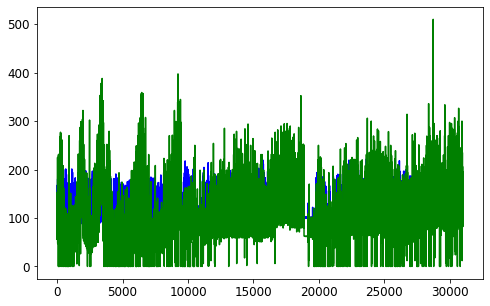

In [118]:
plt.figure(figsize=(8,5))
plt.plot(y_hat,'blue')
plt.plot(y,'green')

In [119]:
rx.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0          0               2015               July   
1  Resort Hotel            1          1               2015               July   
2  Resort Hotel            1          1               2015               July   
3  Resort Hotel            0          1               2015               July   
4  Resort Hotel            0         84               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        28                          8   
2                        28                          8   
3                        28                          8   
4                        28                         11   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     1       2  ...   
1                        0                     1       2  ...   
2                        0                     1       2  ...   
3                        0                     2       2  ...   
4                        1                     1       2  ...   

   booking_changes  deposit_type company days_in_waiting_list customer_type  \
0                0    No Deposit   110.0                    0     Transient   
1                0    No Deposit   110.0                    0     Transient   
2                0    No Deposit   110.0                    0     Transient   
3                0    No Deposit   110.0                    0     Transient   
4                0    No Deposit   113.0                    0     Transient   

      adr  required_car_parking_spaces  total_of_special_requests  \
0  107.42                            0                          0   
1  104.72                            0                          1   
2  104.72                            0                          1   
3  104.72                            1                          1   
4  100.00                            1                          0   

   reservation_status reservation_status_date  
0           Check-Out              2015-07-02  
1            Canceled              2015-07-08  
2            Canceled              2015-07-08  
3           Check-Out              2015-07-10  
4           Check-Out              2015-07-13  

[5 rows x 31 columns]

In [78]:
Featurex = rx[['lead_time','adults','children','babies','is_repeated_guest','previous_cancellations','booking_changes','required_car_parking_spaces','total_of_special_requests','company','adr']]
Featurex = pd.concat([Featurex,pd.get_dummies(rx['deposit_type'])], axis=1)
Featurex = pd.concat([Featurex,pd.get_dummies(rx['assigned_room_type'])], axis=1)
#Feature = pd.concat([Feature,pd.get_dummies(rna['distribution_channel'])], axis=1)
Featurex = pd.concat([Featurex,pd.get_dummies(rx['customer_type'])], axis=1)
Featurex = pd.concat([Featurex,pd.get_dummies(rx['meal'])], axis=1)
Featurex = pd.concat([Featurex,pd.get_dummies(rx['market_segment'])], axis=1)
Featurex = pd.concat([Featurex,pd.get_dummies(rx['hotel'])], axis=1)
Xx = Featurex
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
#Feature.head()
#Featurex.shape
#Feature.info()
Xx.head()

lead_time  adults  children  babies  is_repeated_guest  \
0          0       2       0.0       0                  0   
1          1       2       0.0       0                  0   
2          1       2       0.0       0                  0   
3          1       2       0.0       0                  0   
4         84       2       0.0       0                  0   

   previous_cancellations  booking_changes  required_car_parking_spaces  \
0                       0                0                            0   
1                       0                0                            0   
2                       0                0                            0   
3                       0                0                            1   
4                       0                0                            1   

   total_of_special_requests  company  ...  Undefined  Aviation  \
0                          0    110.0  ...          0         0   
1                          1    110.0  ...          0         0   
2                          1    110.0  ...          0         0   
3                          1    110.0  ...          0         0   
4                          0    113.0  ...          0         0   

   Complementary  Corporate  Direct  Groups  Offline TA/TO  Online TA  \
0              0          1       0       0              0          0   
1              0          1       0       0              0          0   
2              0          1       0       0              0          0   
3              0          1       0       0              0          0   
4              0          1       0       0              0          0   

   City Hotel  Resort Hotel  
0           0             1  
1           0             1  
2           0             1  
3           0             1  
4           0             1  

[5 rows x 43 columns]

In [79]:
yx = rx['is_canceled'].values
#y = rna['reservation_status'].values
yx

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [80]:
Xx= preprocessing.StandardScaler().fit(Xx).transform(Xx)
Xx[0:2]

array([[-0.58894105,  1.42661047, -0.09785932, -0.0515292 , -0.57072458,
        -0.26352394, -0.48772506, -0.35377999, -0.42407633, -0.60212341,
         1.17392873,  0.31144512, -0.283606  , -0.11905828, -1.31103013,
        -0.12095061, -0.17723213, -0.51526683, -0.26404519, -0.14448924,
         9.10568944, -0.06431566, -0.08344437, -0.05567022, -0.03838496,
        -0.02713227, -0.08521391,  0.79814935, -0.78487243,  0.19419043,
        -0.05007369, -0.13060707, -0.09357514, -0.0919618 , -0.17942793,
        -0.21971043,  0.72127773, -0.1776732 , -0.50725407, -0.12586571,
        -0.11969219, -1.08946635,  1.08946635],
       [-0.57694339,  1.42661047, -0.09785932, -0.0515292 , -0.57072458,
        -0.26352394, -0.48772506, -0.35377999,  1.26948818, -0.60212341,
         1.09497635,  0.31144512, -0.283606  , -0.11905828,  0.76275898,
        -0.12095061, -0.17723213, -0.51526683, -0.26404519, -0.14448924,
        -0.10982145, -0.06431566, -0.08344437, -0.05567022, -0.03838496,
   

In [81]:
X_train, X_test, y_train, y_test = train_test_split( Xx, yx, test_size=0.2, random_state=4)

<h2>KNN</h2>

The best accuracy was with 0.9257352941176471 with k= 2


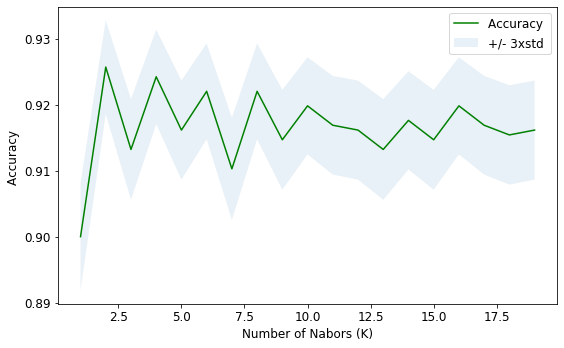

<Figure size 720x720 with 0 Axes>

In [82]:
knn(X_train,X_test,y_train,y_test)

In [83]:
knnf1,knnja = knnSpecific(2,X_train,X_test,y_train,y_test)

Train set Accuracy:  0.9343387897737723
Test set Accuracy:  0.9257352941176471
Avg F1-score: 0.9194
Jaccard score: 0.9257
Precision: 0.9205
Recall: 0.6096
AUC Score: 0.7995


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



<h2>Decision tree</h2>

The best accuracy was with 0.9213235294117647 with k= 9


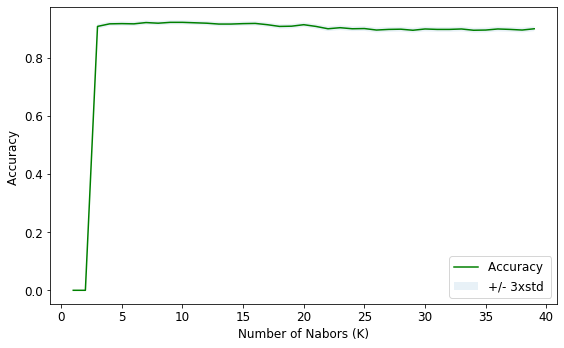

<Figure size 720x720 with 0 Axes>

In [84]:
decision_tree(X_train,X_test,y_train,y_test)

In [85]:
treef1,treeja = decision(9,X_train,X_test,y_train,y_test)

Avg F1-score: 0.9133
Jaccard score: 0.9221
Test set Accuracy:  0.9220588235294118
Precision: 0.9621
Recall: 0.5570
AUC Score: 0.7763


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



<h2>SVM</h2>

In [86]:
svmf1,svmja = SVM_model(X_train,X_test,y_train,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Avg F1-score: 0.9106
Jaccard score: 0.9206
Test set Accuracy:  0.9205882352941176
Precision: 0.9839
Recall: 0.5351
AUC Score: 0.7667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



<h2>Logistic regression</h2>

In [87]:
lrf1,lrja,lrlo = lr(X_train,X_test,y_train,y_test)

Avg F1-score: 0.8914
Jaccard score: 0.9051
Log Loss score: 0.3088
Test set Accuracy:  0.9051470588235294
Precision: 0.9381
Recall: 0.4649
AUC Score: 0.7294


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



In [88]:
tab2 = [['KNN',knnf1,knnja,'NA'],['Decision Tree',treef1,treeja,'NA'],['SVM',svmf1,svmja,'NA'],['Logistic Regression',lrf1,lrja,lrlo]]
result2=pd.DataFrame(tab2, columns = ['Algorithm', 'F1-score','Jaccard','LogLoss']) 
result2

Algorithm  F1-score   Jaccard   LogLoss
0                  KNN  0.919413  0.925735        NA
1        Decision Tree  0.913252  0.922059        NA
2                  SVM  0.910601  0.920588        NA
3  Logistic Regression  0.891445  0.905147  0.308846

In [120]:
newr = rna[rna.hotel =='Resort Hotel' ]
newr1 = rna[rna.hotel =='City Hotel' ]

In [121]:
Feature = newr[['lead_time','adults','children','babies','is_repeated_guest','previous_cancellations','booking_changes','required_car_parking_spaces','total_of_special_requests','agent','adr']]
Feature = pd.concat([Feature,pd.get_dummies(newr['deposit_type'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(newr['assigned_room_type'])], axis=1)
#Feature = pd.concat([Feature,pd.get_dummies(rna['distribution_channel'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(newr['customer_type'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(newr['meal'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(newr['market_segment'])], axis=1)
#Feature = pd.concat([Feature,pd.get_dummies(rna['hotel'])], axis=1)
X = Feature
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
#Feature.head()
#Feature.shape
#Feature.info()
X[0:5]

lead_time  adults  children  babies  is_repeated_guest  \
0         13       1       0.0       0                  0   
1         14       2       0.0       0                  0   
2         14       2       0.0       0                  0   
3          9       2       0.0       0                  0   
4         85       2       0.0       0                  0   

   previous_cancellations  booking_changes  required_car_parking_spaces  \
0                       0                0                            0   
1                       0                0                            0   
2                       0                0                            0   
3                       0                0                            0   
4                       0                0                            0   

   total_of_special_requests  agent  ...  FB  HB  SC  Undefined  \
0                          0  304.0  ...   0   0   0          0   
1                          1  240.0  ...   0   0   0          0   
2                          1  240.0  ...   0   0   0          0   
3                          1  303.0  ...   1   0   0          0   
4                          1  240.0  ...   0   0   0          0   

   Complementary  Corporate  Direct  Groups  Offline TA/TO  Online TA  
0              0          1       0       0              0          0  
1              0          0       0       0              0          1  
2              0          0       0       0              0          1  
3              0          0       1       0              0          0  
4              0          0       0       0              0          1  

[5 rows x 38 columns]

In [122]:
y = newr['is_canceled'].values
#y = rna['reservation_status'].values
y[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [123]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:2]

array([[-0.91800684, -1.83239058, -0.30903035, -0.12043839, -0.15294137,
        -0.06856336, -0.36921843, -0.37682556, -0.83813565,  0.97921184,
        -0.40105504,  0.20236202, -0.19974191, -0.03121266,  1.17350658,
        -0.06071983, -0.24148167, -0.59123723, -0.40771729, -0.20727146,
        -0.23013133, -0.13867949, -0.09332281, -0.2425719 , -0.08263099,
         0.53976292, -0.44171782,  0.61050014, -0.14262585, -0.53714337,
        -0.03965196, -0.16367397, -0.03965196,  8.98160513, -0.31901037,
        -0.35641294, -0.54514376, -1.11003678],
       [-0.90746915,  0.16896297, -0.30903035, -0.12043839, -0.15294137,
        -0.06856336, -0.36921843, -0.37682556,  0.37397199,  0.25410704,
        -0.03107809,  0.20236202, -0.19974191, -0.03121266,  1.17350658,
        -0.06071983, -0.24148167, -0.59123723, -0.40771729, -0.20727146,
        -0.23013133, -0.13867949, -0.09332281, -0.2425719 , -0.08263099,
         0.53976292, -0.44171782,  0.61050014, -0.14262585, -0.53714337,
   

In [124]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

<h1>KNN</h1>
<small>with agent and hotel has Resort hotel</small>

The best accuracy was with 0.8168262439177523 with k= 4


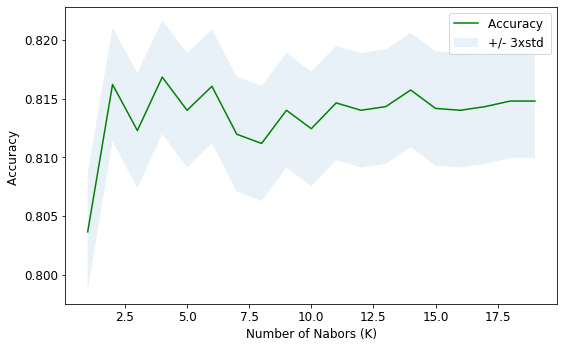

<Figure size 720x720 with 0 Axes>

In [94]:
knn(X_train,X_test,y_train,y_test)

In [95]:
knnf1,knnja = knnSpecific(4,X_train,X_test,y_train,y_test)

Train set Accuracy:  0.8686420722135008
Test set Accuracy:  0.8168262439177523
Avg F1-score: 0.8074
Jaccard score: 0.8168
Precision: 0.7701
Recall: 0.5596
AUC Score: 0.7437


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



<h1>Decision Tree</h1>
<small>with agent and hotel has Resort hotel</small>

The best accuracy was with 0.825459111599435 with k= 16


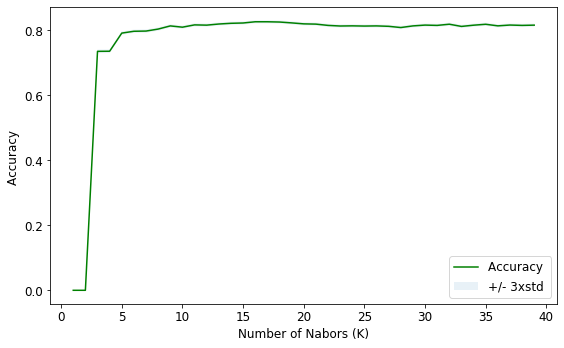

<Figure size 720x720 with 0 Axes>

In [125]:
decision_tree(X_train,X_test,y_train,y_test)

In [126]:
treef1,treeja = decision(16,X_train,X_test,y_train,y_test)

Avg F1-score: 0.8260
Jaccard score: 0.8240
Test set Accuracy:  0.8240464605242505
Precision: 0.6918
Recall: 0.7512
AUC Score: 0.8033


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



<h1>SVM</h1>
<small>with agent and hotel has Resort hotel</small>

In [98]:
svmf1,svmja = SVM_model(X_train,X_test,y_train,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Avg F1-score: 0.8032
Jaccard score: 0.8112
Test set Accuracy:  0.8111756396170146
Precision: 0.7439
Recall: 0.5700
AUC Score: 0.7426


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



<h1>Logistic Regression</h1>
<small>with agent and hotel has Resort hotel</small>

In [99]:
lrf1,lrja,lrlo = lr(X_train,X_test,y_train,y_test)

Avg F1-score: 0.7680
Jaccard score: 0.7873
Log Loss score: 0.4450
Test set Accuracy:  0.7873175325694554
Precision: 0.7536
Recall: 0.4378
AUC Score: 0.6880


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



In [100]:
tab3 = [['KNN',knnf1,knnja,'NA'],['Decision Tree',treef1,treeja,'NA'],['SVM',svmf1,svmja,'NA'],['Logistic Regression',lrf1,lrja,lrlo]]
result3=pd.DataFrame(tab3, columns = ['Algorithm', 'F1-score','Jaccard','LogLoss']) 
result3

Algorithm  F1-score   Jaccard   LogLoss
0                  KNN  0.807432  0.816826        NA
1        Decision Tree  0.826127  0.824831        NA
2                  SVM  0.803216  0.811176        NA
3  Logistic Regression  0.767951  0.787318  0.445026

In [127]:
newr = rna[rna.hotel =='City Hotel' ]

In [128]:
Feature = newr1[['lead_time','adults','children','babies','is_repeated_guest','previous_cancellations','booking_changes','required_car_parking_spaces','total_of_special_requests','agent','adr']]
Feature = pd.concat([Feature,pd.get_dummies(newr1['deposit_type'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(newr1['assigned_room_type'])], axis=1)
#Feature = pd.concat([Feature,pd.get_dummies(rna['distribution_channel'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(newr1['customer_type'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(newr1['meal'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(newr1['market_segment'])], axis=1)
#Feature = pd.concat([Feature,pd.get_dummies(rna['hotel'])], axis=1)
X = Feature
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
#Feature.head()
#Feature.shape
#Feature.info()
X[0:5]

lead_time  adults  children  babies  is_repeated_guest  \
31851          6       1       0.0       0                  0   
31852         88       2       0.0       0                  0   
31853         65       1       0.0       0                  0   
31854         92       2       0.0       0                  0   
31855        100       2       0.0       0                  0   

       previous_cancellations  booking_changes  required_car_parking_spaces  \
31851                       0                0                            0   
31852                       0                0                            0   
31853                       0                0                            0   
31854                       0                0                            0   
31855                       0                0                            0   

       total_of_special_requests  agent  ...  FB  HB  SC  Aviation  \
31851                          0    6.0  ...   0   1   0         0   
31852                          1    9.0  ...   0   0   0         0   
31853                          1    9.0  ...   0   0   0         0   
31854                          2    9.0  ...   0   0   0         0   
31855                          1    9.0  ...   0   0   0         0   

       Complementary  Corporate  Direct  Groups  Offline TA/TO  Online TA  
31851              0          0       0       0              1          0  
31852              0          0       0       0              0          1  
31853              0          0       0       0              0          1  
31854              0          0       0       0              0          1  
31855              0          0       0       0              0          1  

[5 rows x 37 columns]

In [129]:
y = newr1['is_canceled'].values
#y = rna['reservation_status'].values
y[0:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [130]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:2]

array([[-0.98498223, -1.83221547, -0.25111891, -0.05460025, -0.10086178,
        -0.20747272, -0.30072954, -0.14500623, -0.72269722, -0.39241901,
        -2.46112941,  0.43505483, -0.43466664, -0.01545416,  0.62538773,
        -0.15929925, -0.04126019, -0.48899263, -0.15994698, -0.16228689,
        -0.08975687, -0.05605351, -0.18242309, -0.06077436,  0.58121569,
        -0.52585806, -1.81205876, -0.02249211,  3.20925499, -0.41089044,
        -0.01874198, -0.0272941 , -0.06623689, -0.23265873, -0.45188268,
         1.81833907, -1.08652923],
       [-0.25631942,  0.22124681, -0.25111891, -0.05460025, -0.10086178,
        -0.20747272, -0.30072954, -0.14500623,  0.55223895, -0.33925816,
        -0.69687421,  0.43505483, -0.43466664, -0.01545416,  0.62538773,
        -0.15929925, -0.04126019, -0.48899263, -0.15994698, -0.16228689,
        -0.08975687, -0.05605351, -0.18242309, -0.06077436,  0.58121569,
        -0.52585806,  0.55185848, -0.02249211, -0.3115988 , -0.41089044,
        -0.01874

In [131]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

<h1>KNN</h1>
<small>with agent and hotel has City hotel</small>

The best accuracy was with 0.827808988764045 with k= 11


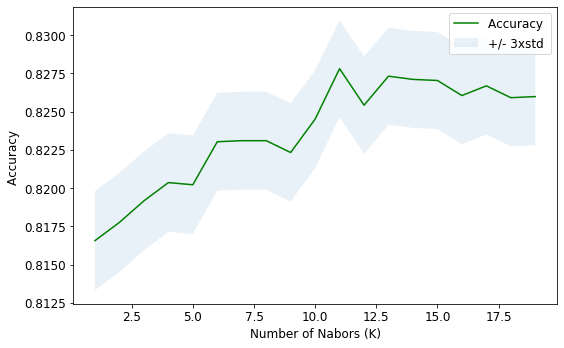

<Figure size 720x720 with 0 Axes>

In [106]:
knn(X_train,X_test,y_train,y_test)

In [107]:
knnf1,knnja = knnSpecific(11,X_train,X_test,y_train,y_test)

Train set Accuracy:  0.8493600435416191
Test set Accuracy:  0.827808988764045
Avg F1-score: 0.8262
Jaccard score: 0.8278
Precision: 0.8414
Recall: 0.7430
AUC Score: 0.8179


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



<h1>Decision Tree</h1>
<small>with agent and hotel has City hotel</small>

The best accuracy was with 0.8298455056179775 with k= 21


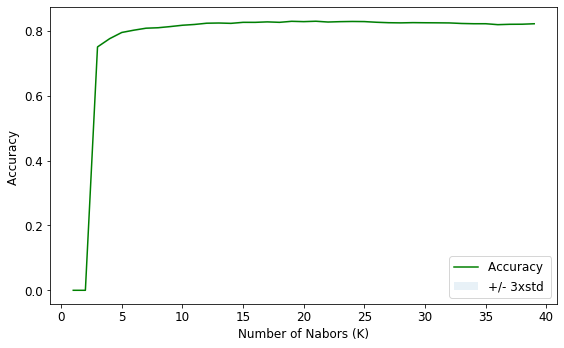

<Figure size 720x720 with 0 Axes>

In [132]:
decision_tree(X_train,X_test,y_train,y_test)

In [133]:
treef1,treeja = decision(21,X_train,X_test,y_train,y_test)

Avg F1-score: 0.8283
Jaccard score: 0.8293
Test set Accuracy:  0.8292837078651686
Precision: 0.8281
Recall: 0.7652
AUC Score: 0.8218


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



<h1>SVM</h1>
<small>with agent and hotel has City hotel</small>

In [110]:
svmf1,svmja = SVM_model(X_train,X_test,y_train,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Avg F1-score: 0.8028
Jaccard score: 0.8063
Test set Accuracy:  0.80625
Precision: 0.8394
Recall: 0.6840
AUC Score: 0.7919


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



<h1>Logistic Regression</h1>
<small>with agent and hotel has City hotel</small>

In [111]:
lrf1,lrja,lrlo = lr(X_train,X_test,y_train,y_test)

Avg F1-score: 0.7886
Jaccard score: 0.7956
Log Loss score: 0.4548
Test set Accuracy:  0.7955758426966292
Precision: 0.8707
Recall: 0.6207
AUC Score: 0.7751


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



In [112]:
tab4 = [['KNN',knnf1,knnja,'NA'],['Decision Tree',treef1,treeja,'NA'],['SVM',svmf1,svmja,'NA'],['Logistic Regression',lrf1,lrja,lrlo]]
result4=pd.DataFrame(tab4, columns = ['Algorithm', 'F1-score','Jaccard','LogLoss']) 
result4

Algorithm  F1-score   Jaccard   LogLoss
0                  KNN  0.826152  0.827809        NA
1        Decision Tree  0.828092  0.829424        NA
2                  SVM  0.802780  0.806250        NA
3  Logistic Regression  0.788565  0.795576  0.454762